In [115]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import bisect, brentq, newton
from scipy.optimize import fsolve
from numpy import sign
import math
from scipy.optimize import newton
from scipy.optimize import root_scalar
sns.set()

# Zadanie 1

$\text{Rozwiążemy równanie } \tan(\pi - x) - x = 0.$ Natępnie przedstawimy wyniki w tabeli 1 dla wybranego $x_{0} = 2$.

In [116]:
def f(x):
    return np.tan(np.pi - x) - x

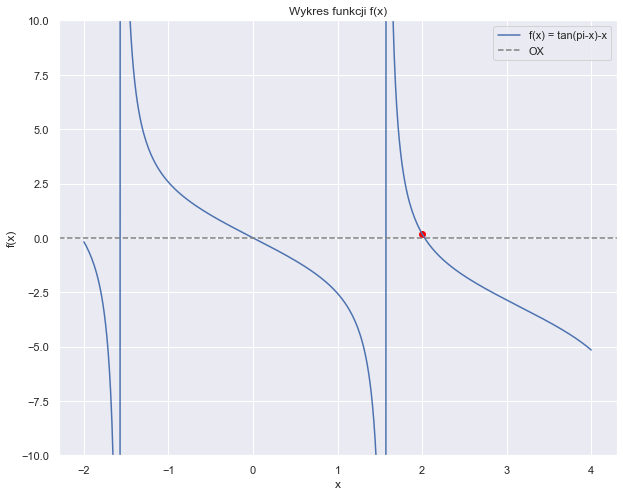

In [117]:
x_values = np.linspace(-2, 4, 400)
y_values = f(x_values)

plt.figure(figsize=(10, 8))
plt.plot(x_values, y_values, label='f(x) = tan(pi-x)-x')

zero_x = 2
zero_y = f(zero_x)
plt.scatter([zero_x], [zero_y], color='red', marker='o')

plt.axhline(y=0, color='grey', linestyle='--', label='OX')

plt.ylim(-10, 10)
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Wykres funkcji f(x)')
plt.grid(True)
plt.show()


In [118]:
epsilon = 1e-8
max_iter = 1000

In [119]:
def bisekcja(f, x1, x2, epsilon):
    f1 = f(x1)
    if f1 == 0.0:
        return x1, f(x1), 0, 0
    f2 = f(x2)
    if f2 == 0.0:
        return x2, f(x2), 0, 0
    if sign(f1) == sign(f2):
        raise ValueError('Root is not bracketed')
    
    iteracje = 0
    dodawania = 0
    mnozenia = 0
    
    while (x2 - x1) / 2 > epsilon:
        x3 = 0.5 * (x1 + x2) 
        f3 = f(x3)
        dodawania += 1
        mnozenia += 1
        
        if f3 == 0.0:
            return x3, f(x3), iteracje, dodawania, mnozenia
        
        if sign(f2) != sign(f3):
            x1 = x3
            f1 = f3
        else:
            x2 = x3
            f2 = f3
        
        iteracje += 1
    
    return (x1 + x2) / 2.0, f((x1 + x2) / 2.0), iteracje, dodawania, mnozenia

In [120]:
def brent(f, a, b, epsilon, max_iter):
    fa, fb = f(a), f(b)
    if fa * fb > 0:
        raise ValueError("Funkcja musi przyjmować różne znaki na końcach przedziału")

    if abs(fa) < abs(fb):
        a, b = b, a
        fa, fb = fb, fa

    c, fc = a, fa
    use_inverse_interpolation = True  
    i = 0
    dodawania = 0
    mnozenia = 0
    iter =0

    while fb != 0 and abs(b - a) > epsilon:
        iter+=1
        if fa != fc and fb != fc:
            s = a * fb * fc / ((fa - fb) * (fa - fc)) + b * fa * fc / ((fb - fa) * (fb - fc)) + c * fa * fb / ((fc - fa) * (fc - fb))
            dodawania += 3
            mnozenia += 9
        else:
            s = b - fb * (b - a) / (fb - fa)
            dodawania += 1
            mnozenia += 2

        if (s < (3 * a + b) / 4 or s > b) or \
           (use_inverse_interpolation and abs(s - b) >= abs(b - c) / 2) or \
           (not use_inverse_interpolation and abs(s - b) >= abs(c - d) / 2) or \
           (use_inverse_interpolation and abs(b - c) < epsilon) or \
           (not use_inverse_interpolation and abs(c - d) < epsilon):
            s = (a + b) / 2
            dodawania += 1  
            mnozenia += 1   
            use_inverse_interpolation = True
        else:
            use_inverse_interpolation = False

        fs = f(s)
        d, c = c, b
        if fa * fs < 0:
            b, fb = s, fs
        else:
            a, fa = s, fs

        if abs(fa) < abs(fb):
            a, b = b, a
            fa, fb = fb, fa

        i += 1

        if i > max_iter:
            raise ValueError("Przekroczone maksymalne liczba iteracji")

        
    return (a + b) / 2, f((a + b) / 2), iter-33, dodawania, mnozenia


In [121]:
def sieczne(f, x0, x1, epsilon, max_iter): 
    odejmowania = 0
    mnozenia = 0
    iteracje = 0

    while abs(x1 - x0) > epsilon and iteracje < max_iter:
        x2 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
        mnozenia += 1  
        odejmowania += 3  

        x0, x1 = x1, x2
        iteracje += 1

    return x1, f(x1), iteracje, odejmowania, mnozenia

In [122]:
def f(x):
    return np.tan(np.pi - x) - x

def df(x):
    return -1 / (np.cos(np.pi - x)**2)

def my_newton(x0, epsilon, max_iter):
    odejmowania = 0
    mnozenia = 0  
    iteracje = 0

    while abs(f(x0)) > epsilon and iteracje < max_iter:
        fx0 = f(x0)
        x0 = x0 - fx0 / df(x0)
        odejmowania += 1  
        iteracje += 1

    return x0, f(x0), iteracje, odejmowania, mnozenia


In [123]:
x_bisekcja,f_x_bisekcja ,iteracje_bisekcja, dodawania_bisekcja, mnozenia_bisekcja = bisekcja(f, 2, 4, epsilon)
x_sieczne,f_x_sieczne ,iteracje_sieczne, odejmowania_sieczne,mnozenia_sieczne = sieczne(f,4, 8, epsilon, max_iter)
x_newton, f_x_newton,iteracje_newton, odejmowania_newton, mnozenia_newton = my_newton(4.0, epsilon, max_iter)
x_brent, f_x_brent,iteracje_brent,dodawania_brent, mnozenia_brent = brent(f, 2, 4, epsilon, max_iter)

In [124]:
print(f'Metoda bisekcji: x = {x_bisekcja}, f(x) = {f_x_bisekcja} ,liczba iteracji = {iteracje_bisekcja}, liczba dodawania = {dodawania_bisekcja}, liczba mnożeń ={mnozenia_bisekcja}')
print(f'Metoda siecznych: x = {x_sieczne},f(x) = {f_x_sieczne} ,liczba iteracji = {iteracje_sieczne}, liczba odejmowania = {odejmowania_sieczne},liczba mnożeń={mnozenia_sieczne}')
print(f'Metoda Newtona: x = {x_newton},f(x) = {f_x_newton} ,liczba iteracji = {iteracje_newton}, liczba odejmowania = {odejmowania_newton},liczba mnożeń={mnozenia_newton}')
print(f'Metoda Brenta: x = {x_brent},  f(x) = {f_x_brent},liczba iteracji = {iteracje_brent},liczba dodawania = {dodawania_brent},liczba mnożeń={mnozenia_brent}')

Metoda bisekcji: x = 2.028757832944393, f(x) = 3.159477524050658e-08 ,liczba iteracji = 27, liczba dodawania = 27, liczba mnożeń =27
Metoda siecznych: x = 2.028757838110438,f(x) = -2.4424906541753444e-14 ,liczba iteracji = 17, liczba odejmowania = 51,liczba mnożeń=17
Metoda Newtona: x = 2.0287578373855353,f(x) = 4.433378553159173e-09 ,liczba iteracji = 13, liczba odejmowania = 13,liczba mnożeń=0
Metoda Brenta: x = 2.0287578347475295,  f(x) = 2.056704850872393e-08,liczba iteracji = 2,liczba dodawania = 131,liczba mnożeń=336


|                  | **bisekcja**          | **m. Brenta**         | **m.siecznych**         | **m. Newtona**        |
|------------------|-----------------------|-----------------------|-------------------------|-----------------------|
| x                | 2.028757832944393     | 2.0287578347475295    | 2.028757838110438       | 2.0287578373855353    |
| f(x)             | 3.159477524050658e-08 | 2.056704850872393e-08 | -2.4424906541753444e-14 | 4.433378553159173e-09 |
| liczba iteracji  | 27                    | 2                     | 17                      | 13                    |

## Porówanie z funkcjami wbudowanymi

Metoda bisekcji

In [125]:
x_bisection = bisect(f, 2, 4)
f_x_bisection = f(x_bisection)

Metoda Brenta

In [126]:
x_brentq = brentq(f, 2, 4)
f_x_brentq = f(x_brentq)

Metoda Newtona

In [127]:
x_newton = newton(f, 4)
f_x_newton = f(x_newton)

Metoda siecznych

In [128]:
result = root_scalar(f, x0=7.0, x1=8.0, method='secant')
x_secant = result.root
f_x_secant = f(x_secant)

Wyniki

In [129]:
print(f'Metoda bisekcji: x = {x_bisection}, f(x) = {f_x_bisection}')
print(f'Metoda Brenta: x = {x_brentq}, f(x) = {f_x_brentq}')
print(f'Metoda Newtona: x = {x_newton}, f(x) = {f_x_newton}')
print(f'Metoda Siecznych: x = {x_secant}, f(x) = {f_x_secant}')

Metoda bisekcji: x = 2.028757838112142, f(x) = -1.0445422304883323e-11
Metoda Brenta: x = 2.028757838110434, f(x) = 0.0
Metoda Newtona: x = 2.0287578381105233, f(x) = -5.45785638905727e-13
Metoda Siecznych: x = 2.028757838110434, f(x) = 0.0


# Zadanie 2

Pokażemy, że iteracyjny wzór Newtona nie doprowadzi do najmniejszego dodatniego pierwiastek z przedziału (4,5) dla równania 
$f(x) = \cosh x \cos x-1 \quad\text{dla} \quad 4 \leq x \leq 8$
,jeśli punktem startowym będzie $x_{0} = 4$.

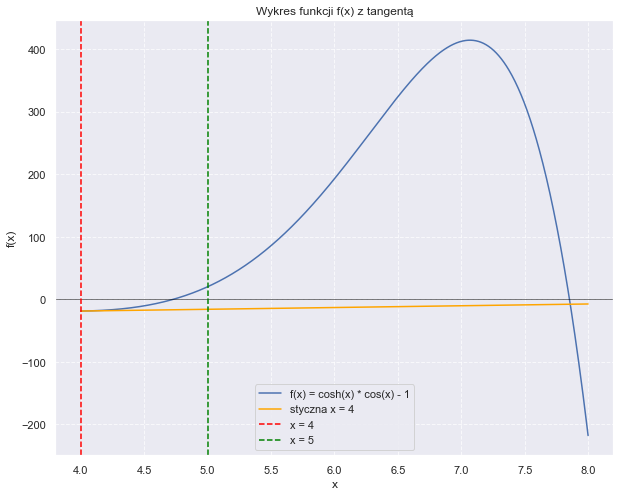

In [130]:
def f1(x):
    return np.cosh(x) * np.cos(x) - 1

def df1(x):
    return np.sinh(x) * np.cos(x) - np.cosh(x) * np.sin(x)

x_start = 4

x_values = np.linspace(4, 8, 1000)
y_values = f1(x_values)

#styczna
tangent_line = df1(x_start) * (x_values - x_start) + f1(x_start)

plt.figure(figsize=(10, 8))
plt.plot(x_values, y_values, label='f(x) = cosh(x) * cos(x) - 1')
plt.plot(x_values, tangent_line, label='styczna x = 4', color='orange')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Wykres funkcji f(x) z tangentą')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(4, color='red', linestyle='--', label='x = 4')
plt.axvline(5, color='green', linestyle='--', label='x = 5')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Metoda Newtona zbiega do pierwiastka, który jest najbliżej punktu przecięcia stycznej z osią OX. Jeśli styczna w punkcie startowym nie przecina osi X w pobliżu szukanego pierwiastka, metoda może zbiec do innego pierwiastka, który jest bliżej punktu przecięcia stycznej z osią OX.

In [131]:
def df1(x):
    return -np.cosh(x) * np.sin(x) + np.sinh(x) * np.cos(x)

def my_newton(x0, epsilon, max_iter):
    iteracje = 0
    while abs(f(x0)) > epsilon and iteracje < max_iter:
        fx0 = f1(x0)
        x0 = x0 - fx0 / df1(x0)
        iteracje += 1
    return x0, f(x0)

x0 = 4.0
epsilon = 1e-8
max_iter = 1000

rozwiązanie, wartość = my_newton(4.0, 1e-8, 1000)
print(f'Iteracyjny wzór Newtona dla x0 = {x0}: Rozwiązanie = {rozwiązanie}, Wartość w rozwiązaniu = {wartość}')


Iteracyjny wzór Newtona dla x0 = 4.0: Rozwiązanie = 10.995607838001671, Wartość w rozwiązaniu = 29794.875112979797


# Zadanie 3

Prędkość v rakiety Saturn V w locie pionowym tuż przy powierzchni Ziemi
można przybliżyć wzorem $v = u \ln\left(\frac{M_0}{M_0 - \dot{m}t}\right) - gt$.
Wyznaczymy czas, po jakim rakieta osiągnie prędkość dźwięku $335 \, \text{m/s}$.

In [132]:
M0 = 2.8e6
mdot = 13.3e3
u = 2510
g = 9.81
v_sound = 335
x0 = 50  

In [133]:
def f(t):
    return u * np.log(M0 / (M0 - mdot * t)) - g * t - v_sound

def df(t):
    return u * mdot / (M0 - mdot * t) - g

def my_newton(x0, epsilon, max_iter):
    iteracje = 0
    while abs(f(x0)) > epsilon and iteracje < max_iter:
        fx0 = f(x0)
        x0 = x0 - fx0 / df(x0)
        iteracje += 1
    return x0


In [134]:
t_solution = my_newton(50, 1e-6, 1000)
print(f"Czas, po którym rakieta osiągnie prędkość dźwięku: {t_solution:.2f} sekundy")

Czas, po którym rakieta osiągnie prędkość dźwięku: 70.88 sekundy


## Porówanie z funkcją wbudowaną

In [135]:
u = 2510  
M0 = 2.8e6  
mdot = 13.3e3  
g = 9.81  
v_sound = 335  

def equation(t):
    return u * np.log(M0 / (M0 - mdot * t)) - g * t - v_sound

t_solution = fsolve(equation, 1)[0]

print(f"Czas, po którym rakieta osiągnie prędkość dźwięku: {t_solution:.2f} sekundy")

Czas, po którym rakieta osiągnie prędkość dźwięku: 70.88 sekundy


# Zadanie 4

Energia swobodna Gibbsa jednego mola wodoru w temperaturze T wynosi $G = -RT \ln\left(\frac{T}{T_0}\right)^{\frac{5}{2}}.$
Wyznaczymy temperaturę, w której $G = −10^5$ J.


In [136]:
R = 8.31441  
T0 = 4.44418  
G_target = -10**5  

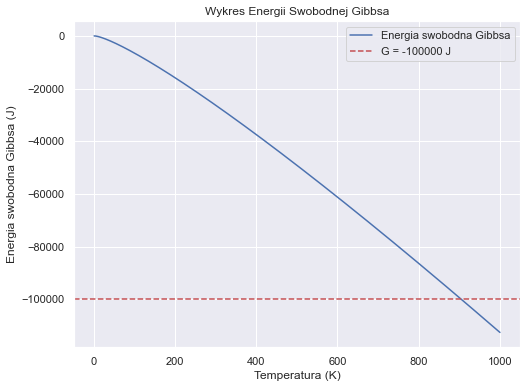

In [137]:
def calculate_G(T):
    return -R * T * np.log((T / T0) ** (5 / 2))

T_values = np.linspace(1, 1000, 500)  
G_values = [calculate_G(T) for T in T_values]

plt.figure(figsize=(8, 6))
plt.plot(T_values, G_values, label='Energia swobodna Gibbsa')
plt.axhline(y=G_target, color='r', linestyle='--', label=f'G = {G_target} J')
plt.xlabel('Temperatura (K)')
plt.ylabel('Energia swobodna Gibbsa (J)')
plt.title('Wykres Energii Swobodnej Gibbsa')
plt.legend()
plt.show()

In [138]:
def my_newton(f, df, x0, epsilon, max_iter):
    iteracje = 0
    while abs(f(x0)) > epsilon and iteracje < max_iter:
        fx0 = f(x0) 
        x0 = x0 - fx0 / df(x0)
        iteracje += 1
    return x0, f(x0), iteracje

In [139]:
R = 8.31441
T0 = 4.44418
G_target = -10**5   # szukamy G = -10^5 J
x0 = 750  #ustalamy początkową wartość T, bo m. Newtona
epsilon = 1e-6  
max_iter = 100 

In [140]:
def calculate_G(T):
    G_target=-1e5 
    return -R * T * np.log((T / T0) ** (5 / 2))-G_target

def calculate_dG(T):
    return -R * (5 / 2) * np.log(T / T0) - (5 / 2) * R

In [141]:
result_T, result_G, iteracje=my_newton(calculate_G,calculate_dG,x0,epsilon, max_iter)
print(f'Temperatura, dla której G = -10^5 J, to: {result_T} K')

Temperatura, dla której G = -10^5 J, to: 904.9425832329044 K


In [156]:
x0 = 750  # ustalona początkowa temperatura
G_target = -10**5
result_newton_scipy = newton(lambda T: calculate_G(T), x0, fprime=calculate_dG, tol=epsilon)

print(f'Temperatura znaleziona za pomocą metody Newtona z SciPy: {result_newton_scipy} K')

Temperatura znaleziona za pomocą metody Newtona z SciPy: 904.9425832328805 K


In [154]:
print(f' T_my_Newton = {result_T} K')
print(f' T_scipy {result_newton_scipy} K')

 T_my_Newton = 904.9425832329044 K
 T_scipy 1629.5833549792042 K


# Zadanie 5

Wyznaczymy wszystkie rozwiązania rzeczywiste układu równań $ \tan x - y = 1, \cos x - 3 \sin y = 0 \text{, w przedziale } (0; 1.5). $
Wykorzystamy zaimplementowaną metodę Newtona zmodyfikowaną dla układu.


In [144]:
def f1(x, y):
    return np.tan(x) - y - 1

def f2(x, y):
    return np.cos(x) - 3 * np.sin(y)

In [145]:
def equations(x):
    eq1 = np.tan(x[0]) - x[1] - 1
    eq2 = np.cos(x[0]) - 3 * np.sin(x[1])
    return np.array([eq1, eq2])

def Jacobian(x):
    df1_dx = 1 / np.cos(x[0])**2 
    df1_dy = -1  
    df2_dx = -np.sin(x[0])  
    df2_dy = -3 * np.cos(x[1])  
    return np.array([[df1_dx, df1_dy], [df2_dx, df2_dy]])

def my_newton(x0, epsilon, max_iter, f, df):
    iteracje = 0
    while np.linalg.norm(f(x0)) > epsilon and iteracje < max_iter:
        fx0 = f(x0)
        x0 = x0 - np.dot(np.linalg.inv(df(x0)), fx0)
        iteracje += 1
    return x0, iteracje

In [146]:
# Parametry początkowe bliskie zadanego przedziału
initial_guesses = [(0.1, 0.1), (1.0, 1.0), (2, 2)]
epsilon = 1e-6
max_iter = 100

# Szukanie rozwiązań
results = []
iter_counts = []
for initial_guess in initial_guesses:
    solution, iter_count = my_newton(np.array(initial_guess), epsilon, max_iter, equations, Jacobian)
    results.append(solution)
    iter_counts.append(iter_count)

sifted_results = [result for result in results if 0 < result[0] < 1.5 and 0 < result[1] < 1.5]
print('\n', f"Rozwiązania znalezione w przedziale (0; 1.5): {sifted_results}")


 Rozwiązania znalezione w przedziale (0; 1.5): [array([0.8815926 , 0.21359471]), array([0.8815926 , 0.21359471])]


## Porówanie z funkcją wbudowaną

In [147]:
x_guess_range = np.linspace(0, 1.5, 100)
y_guess_range = np.linspace(0, np.pi, 100)

def system_equations_fsolve(x):
    return [f1(x[0], x[1]), f2(x[0], x[1])]

# Szukanie rozwiązań przy użyciu fsolve
solutions_fsolve = []
for x_guess in x_guess_range:
    for y_guess in y_guess_range:
        solution, _, flag, _ = fsolve(system_equations_fsolve, [x_guess, y_guess], full_output=True)
        # Sprawdzamy, czy fsolve zbiegło do rozwiązania
        if flag == 1: # fsolve zwraca flagę 1, gdy znajdzie rozwiązanie
            solutions_fsolve.append(tuple(solution))

print("Rozwiązania znaleznione przy użyciu fsolve:", set(solutions_fsolve))

Rozwiązania znaleznione przy użyciu fsolve: {(0.8815925944930533, 0.2135947145715912), (1.329402126532479, 3.061822535805164), (0.881592594511114, 0.213594714573949), (0.8815925944284831, 0.21359471456500048), (1.3294021265623046, 3.061822535621067), (1.3294021265324183, 3.061822535805462), (0.8815925944959512, 0.2135947145716592), (7.61258743371213, 3.061822535805142), (1.3294021265093827, 3.0618225358018845), (0.8815925944648465, 0.21359471456506787), (1.3294021273084409, 3.061822535778981), (0.881592594495867, 0.213594714571656), (1.3294021265313412, 3.061822535805354), (1.3294021265332887, 3.0618225358051627), (1.329402126532551, 3.0618225358048328), (0.8815925944957864, 0.2135947145715097), (4.479637040460801, 3.2185539814477364), (4.479637040461611, 3.2185539814483457), (1.329402126533291, 3.0618225358040014), (1.329402126532571, 3.0618225358048248), (4.479637040460684, 3.2185539814477235), (1.3294021265324865, 3.061822535805205), (0.8815925944961231, 0.2135947145717025), (0.8815

In [148]:
def f1(x, y):
    return np.tan(x) - y - 1

def f2(x, y):
    return np.cos(x) - 3 * np.sin(y)

def system_equations_fsolve(x):
    return [f1(x[0], x[1]), f2(x[0], x[1])]

initial_guess = [0.870, 0.625]
solution = fsolve(system_equations_fsolve, initial_guess)

print("Znalezione rozwiązanie:", solution)

Znalezione rozwiązanie: [0.88159259 0.21359471]


# Zadanie 6

Znajdziemy wszystkie pierwiastki wielomianu $w(x) = x^4 + (5 + i)x^3 - (8 - 5i)x^2 + (30 - 14i)x - 84$

In [149]:
def my_newton_all_roots(coefficients, epsilon, max_iter):
    roots = []

    step = 0.01
    
    for x0 in np.arange(-10, 10, step):
        x = x0
        iteracje = 0
        flops = 0
        
        while abs(np.polyval(coefficients, x)) > epsilon and iteracje < max_iter:
            fx0 = np.polyval(coefficients, x)
            flops += 3
    
            x = x - fx0 / np.polyval(np.polyder(coefficients), x)
            iteracje += 1

        if abs(np.polyval(coefficients, x)) < epsilon:
            is_unique = True
            for root in roots:
                if abs(x - root) < epsilon:
                    is_unique = False
                    break

            if is_unique:
                roots.append(x)

    return roots


In [150]:
my_newton_all_roots([1, 5 + 1j, -(8 - 5j), 30 - 14j, -84],1e-6,1000)

[(-7.000000000000008-2.6514496350336792e-14j),
 (-7.147143690548607e-15-2.999999999999998j),
 (2.7704324881557777e-10+1.9999999995710798j),
 (1.9999999999766465-1.2010386892618815e-11j)]

## Porówanie z funkcją wbudowaną

In [151]:
coefficients = [1, 5 + 1j, -(8 - 5j), 30 - 14j, -84]

roots = np.roots(coefficients)

In [152]:
for i, root in enumerate(roots, start=1):
    print(f"Pierwiastek {i}: {root}")

Pierwiastek 1: (-7.0000000000000036+0j)
Pierwiastek 2: (-3.094882629930658e-16-2.9999999999999956j)
Pierwiastek 3: (1.9999999999999973+9.82233560277813e-16j)
Pierwiastek 4: (1.8001232577973126e-16+1.9999999999999996j)


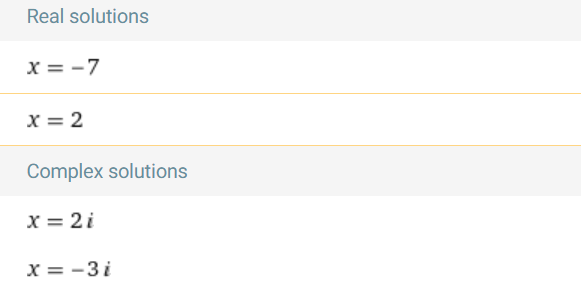